# Invoives GPT

<center>
    
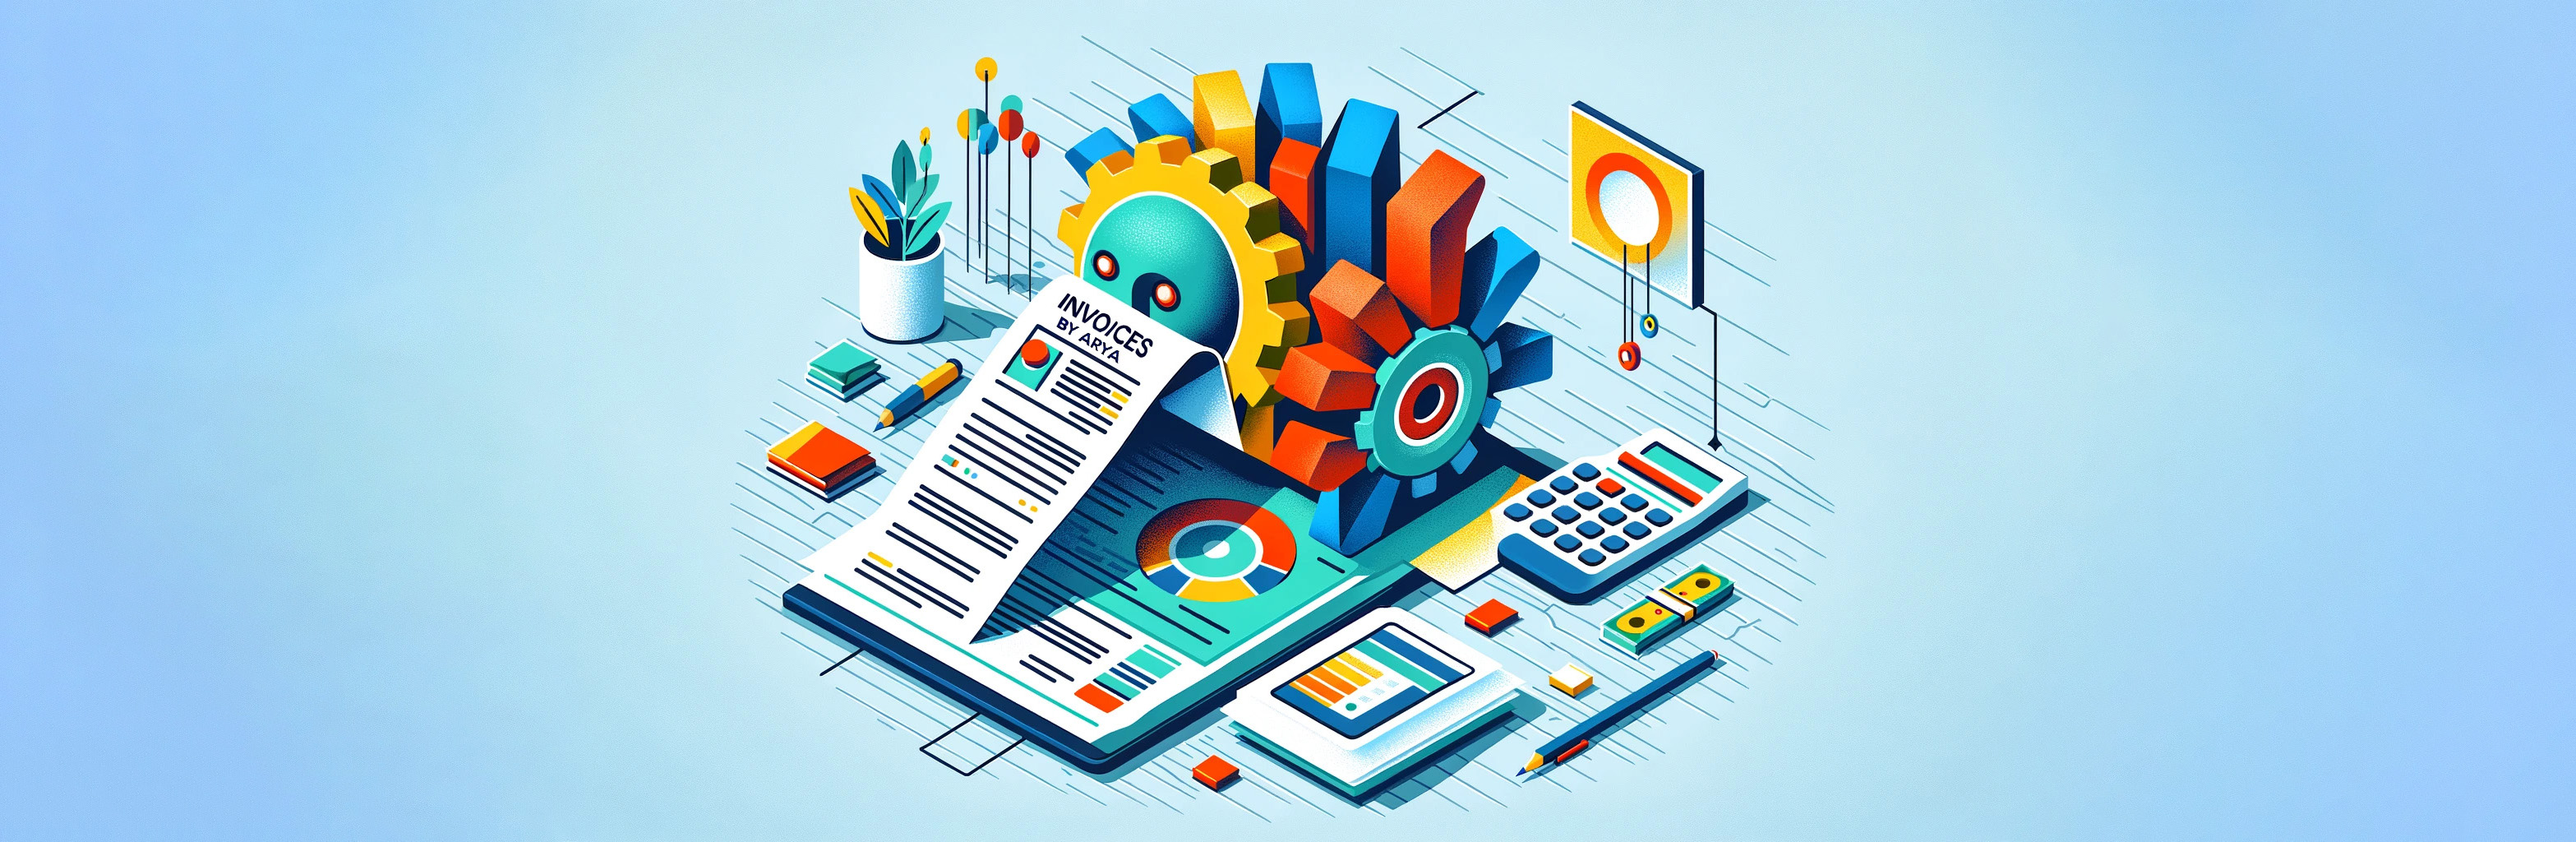

</center>

**Table of Contents**

* [Preparation](#Preparation)
    * [Importing-libraries](#Importing-libraries)
    * [API Key](#API-key)
    * [Create list of file names](#Create-list-of-file-names)
* [Read invoices](#Read-Invoices)
    * [Create dictionary with PDF texts](#Create-dictionary-with-PDF-texts)
    * [Sort data into a data frame](#Sort-data-into-a-data-frame)
* [Prompt Design (Prompt Engineering)](#Prompt-Design-(Engineering))
* [Send Prompt, Receive Ouput](#Send-Prompt-&-Receive-Ouput)
    * [Sending a single prompt to GPT](#Sending-a-single-prompt-to-GPT)
    * [Displaying GPT's output](#Displaying-GPT's-output)
    * [Sending many prompts in a `for` loop](#Sending-many-prompts-in-a-for-loop)
    * [Viewing our generated parsed data frame](#Viewing-our-generated-parsed-data-frame)
* [Saving to a File](#Save-to-a-File)
* [Wrap-up](#Wrap-up)

In this demonstrative and simple mini-project, we'll look at how the use of emerging LLMs such as OpenAI's APIs can help reduce the complexity, time and knowledge needed to write necessary code to perform various tasks. In this example, we'll only focus of one of many (potentially infinite) ways of how a generative AI model can ease the process of otherwise complicated tasks.

Let's take a look at how we can parse and extract necessary pieces of information from many Invoices, saved in form of PDF files.

_Note: Lines of codes are explained via comments. For further understanding, refer to the corresponding documentation._

## Preparation

### Importing libraries

In [13]:
from openai import OpenAI # To instantiate an instance of the base class for sending prompts to the model via API
import os                 # To access paths to files on the computer
import PyPDF2             # To read PDF files and convert to text
import pandas as pd       # To organize data into tables and add rows

### API key

**Setup your API key for all projects**: By following this step from https://platform.openai.com/docs/quickstart?context=python, we can easily add our API key to `PATH`. Doing so will make our API key accessible for all projects. This way, the `OpenAI` Python library will automatically detect it and use it without having to write any code. Besides, when sharing your code, no one can hijack your privat key.

In [14]:
# All it takes to create the openai object!
client = OpenAI()

### Create list of file names

In [15]:
# Path to PDF files
pdf_paths = './Invoices/'

# exact path to PDF files to read
pdf_files = [pdf_paths+pdf for pdf in os.listdir(pdf_paths) if pdf.endswith('.pdf')]

## Read Invoices

### Create dictionary with PDF texts

Here we extract the text from each PDF invoice and adding it to our dictionary in a loop:

In [16]:
# Creating an empty dictionary to append to in the foor loop below:
pdf_dict = {}

for file in pdf_files:

    # Read each PDF file
    reader = PyPDF2.PdfReader(file)

    # In case the invoice has more than 1 page
    if len(reader.pages) > 1:
        page1 = reader.pages[0]       # Reading the first page
        text1 = page1.extract_text()  # The text of the first read page

        page2 = reader.pages[-1]      # Reading the last page
        text2 = page2.extract_text()  # The text of the last read page

        text = text1 + '   ' + text2  # Combining the text from the first & last page
    
    else:
        page = reader.pages[0]        # Reading the only page
        text = page.extract_text()    # The text of the read page
    
    # Setting the invoice number of each pdf file as the `keys` of our dictionary
    # Tip: 3rd string (after '/') is the pdf filename, then 1st part before '.' is the invoice number
    dict_key = file.split('/')[2].split('.')[0]

    # Setting the `values` of our dictionary to the cleaned text
    # Tip: Spltting the text1 string by '\n' or other separators and replacing them with a white space to display better
    pdf_dict[dict_key] = ' '.join(text.split())

pdf_dict.keys() # Previewing the `keys` of our dictionary (invoice numbers)

dict_keys(['SE-AOSE-2023-43472', 'LU-ASE-2023-12695257', 'LU-ASE-2023-8790642', 'LU-CN-ASE-2023-3213289', 'LU-ASE-2023-12101269', 'LU-ASE-2023-8776110', 'GB-AOUK-2023-345771', 'LU-ASE-2023-10614091', 'LU-ASE-2023-12695255', 'ITAOIT3-359236', 'LU-CN-ASE-2023-2636301', 'LU-ASE-2023-7203856', 'ITAOIT3-197685', 'LU-ASE-2023-9636630', 'LU-ASE-2023-12052408', 'LU-ASE-2023-11398004', 'LU-ASE-2023-10420029', 'LU-ASE-2023-12742496', 'ES-AOES-2023-277734', 'LU-CN-ASE-2023-3267242', 'LU-ASE-2023-12742494', 'LU-ASE-2023-8790634', 'LU-ASE-2023-12009247', 'DE-AOG-2023-582843', 'LU-ASE-2023-12728561', 'NL-AONL-2023-99377', 'LU-ASE-2023-9300139', 'LU-ASE-2023-12009250', 'LU-ASE-2023-7579045', 'LU-ASE-2023-12728562', 'LU-ASE-2023-7579044', 'LU-CN-ASE-2023-3294769', 'PL-AOPL-2023-17866', 'LU-ASE-2023-9280504', 'NL-AONL-2023-74398', 'LU-ASE-2023-9280474', 'NL-AONL-2023-58277', 'LU-ASE-2023-12746650', 'FR-AOFR-2023-368402', 'LU-ASE-2023-9300115', 'LU-CN-ASE-2023-4259976', 'LU-ASE-2023-11182132', 'LU-ASE-2

### Sort data into a data frame

In [17]:
# Turning our dictionary into a data frame for organization, speed and easier appending of rows later
invoice_df = pd.DataFrame(columns=['InvoiceNumber', 'InvoiceText'],
                          data={'InvoiceNumber': pdf_dict.keys(), 'InvoiceText': pdf_dict.values()})

invoice_df

,InvoiceNumber,InvoiceText
0,SE-AOSE-2023-43472,FAKTURA/INVOICE 1Fakturadatum/Invoice Date: 30...
1,LU-ASE-2023-12695257,FACTURA FISCAL 1Fecha de la factura: 30/06/202...
2,LU-ASE-2023-8790642,INVOICE 1Invoice Date: 31/05/2023 Invoice Numb...
3,LU-CN-ASE-2023-3213289,STEUERGUTSCHRIFT Ausstellungsdatum der Gutschr...
4,LU-ASE-2023-12101269,INVOICE 1Invoice Date: 30/06/2023 Invoice Numb...
...,...,...
86,LU-ASE-2023-8776095,RECHNUNG 1Rechnungsdatum: 31/05/2023 Rechnungs...
87,LU-ASE-2023-7220662,FATTURA 1Data fattura: 30/04/2023 Numero fattu...
88,GB-AOUK-2023-581176,INVOICE 1Invoice Date: 30/06/2023 Invoice Numb...
89,LU-ASE-2023-8251352,INVOICE 1Invoice Date: 30/04/2023 Invoice Numb...


## Prompt Design (Engineering)

Here's all the _art_ in this demonstration and where it's the most interesting. The purpose is to **parse semi-unstructured data** into a python dictionary as a form of keys and values.

I'll be using **Few-Shot Learning** and more specifically **Contextual Prompting** for our purposes.

* **Few-Shot Prompting**: In this method, the model is given a few examples to understand the context and potentially the desired response format. The series of messages provided, serve as examples that demonstrate the format setting the expectation for the type of response the model should generate. The inclusion of roles (like "system," "user," and "assistant") in the messages makes it clear who is speaking and who is expected to respond, which is a characteristic often utilized in few-shot learning to provide clear examples of interaction patterns.

* **Contextual Prompting**: Could be considered a special case of **k-shot prompting**. In contextual prompting, the model is given a context (in this case, a back and fourth with the model, expecting certain information extraction) and is expected to respond in line with that context. The sequence of messages sets the scene and guides the model on how to continue the "*conversation*", taking into account the roles and previous content.


In [18]:
# A system prompt guides the AI to instruct how to answer or behave
system_prompt = '''You are a helpful assistant and an expert in data analysis, extraction and interpretation.
You have great attention to detail and think step by step before answering.
You'll be presented with unstructured text in different languages, which you'll do your best to understand.
Your task is to carefully extract certain information and parse it into a Python dictionary format.
To make your task easier for you, you will be given examples in a form of conversations first.'''

In [19]:
# A "fake" user prompt as an example (shot) | Selecting specific invoice numbers & inputting their PDF-text in the user prompt
user_prompt_shot1 = f'''Extract the follo
wing information from the text below delimited by <example>:
'InvoiceNumber', 'SupplierName', 'InvoicePurpose', 'InvoiceDate', 'PaymentDate', 'TotalAmount', 'VATPercentage', 'VATAmount'

<example>{invoice_df.InvoiceText[invoice_df.InvoiceNumber == 'GB-AOUK-2023-453640'].item()}</example>'''


# A "fake" assistant (AI) response to show GPT how to find the CORRECT information, parse text and categorize
assistant_prompt_shot1 = '''{'InvoiceNumber': 'GB-AOUK-2023-453640', 'SupplierName': 'Amazon Online UK Limited', 'InvoicePurpose': 'AMS Charges', 'InvoiceDate': '2023-05-31', 'TotalAmount': 'GBP 43.22', 'VATPercentage': '0.00%', 'VATAmount': 'GBP 0.00'}'''

In [20]:
# A "fake" user prompt as an example (shot) | Selecting specific invoice numbers & inputting their PDF-text in the user prompt
user_prompt_shot2 = f'''Extract the following information from the text below delimited by <example>:
'InvoiceNumber', 'SupplierName', 'InvoicePurpose', 'InvoiceDate', 'PaymentDate', 'TotalAmount', 'VATPercentage', 'VATAmount'

<example>{invoice_df.InvoiceText[invoice_df.InvoiceNumber == 'LU-ASE-2023-8776110'].item()}</example>'''


# A "fake" assistant (AI) response to show GPT how to find the CORRECT information, parse text and categorize
assistant_prompt_shot2 = '''{'InvoiceNumber': 'LU-ASE-2023-8776110', 'SupplierName': 'Amazon Services Europe S.à r.l.', 'InvoicePurpose': 'Verkaeufergebuehren', 'InvoiceDate': '2023-05-31', 'TotalAmount': 'EUR 361.10', 'VATPercentage': '0.00%', 'VATAmount': 'EUR 0.00'}'''

In [21]:
# A "fake" user prompt as an example (shot) | Selecting specific invoice numbers & inputting their PDF-text in the user prompt
user_prompt_shot3 = f'''Extract the following information from the text below delimited by <example>:
'InvoiceNumber', 'SupplierName', 'InvoicePurpose', 'InvoiceDate', 'PaymentDate', 'TotalAmount', 'VATPercentage', 'VATAmount'

<example>{invoice_df.InvoiceText[invoice_df.InvoiceNumber == 'ITAOIT3-359236'].item()}</example>'''


# A "fake" assistant (AI) response to show GPT how to find the CORRECT information, parse text and categorize
assistant_prompt_shot3 = '''{'InvoiceNumber': 'ITAOIT3-359236', 'SupplierName': 'Amazon Online Italy S.r.l.', 'InvoicePurpose': 'Commissioni', 'InvoiceDate': '2023-05-31', 'TotalAmount': 'EUR 64.04', 'VATPercentage': '0.00%', 'VATAmount': 'EUR 0.00'}'''

## Send Prompt & Receive Ouput

### Sending a single prompt to GPT

Here, we're calling the API and choosing one invoice for testing purposes:

In [23]:
# Find specific invoices with their numbers | .item() pops out the string value
user_main_prompt = invoice_df.InvoiceText[invoice_df.InvoiceNumber == 'SE-AOSE-2023-43472'].item()

# Sending all the prompts to GPT API and saving the output (response) to a variable 
chat_completion = client.chat.completions.create(model='gpt-3.5-turbo',
                                                     messages=[{"role": "system", "content": system_prompt},
                                                               {"role": "user", "content": user_prompt_shot1},
                                                               {"role": "assistant", "content": assistant_prompt_shot1},
                                                               {"role": "user", "content": user_prompt_shot2},
                                                               {"role": "assistant", "content": assistant_prompt_shot2},
                                                               {"role": "user", "content": user_prompt_shot3},
                                                               {"role": "assistant", "content": assistant_prompt_shot3},
                                                               {"role": "user", "content": user_main_prompt}],
                                                     temperature=0.5)            # Lower `temperature` values make the response more deterministic (less random or "creative")

### Displaying GPT's output

It seems to have done the job pretty well!

In [25]:
chat_completion.choices[0].message.content

"{'InvoiceNumber': 'SE-AOSE-2023-43472', 'SupplierName': 'Amazon Online Sweden AB', 'InvoicePurpose': 'AMS-kosten', 'InvoiceDate': '2023-06-30', 'TotalAmount': 'SEK 22.19', 'VATPercentage': '0.00%', 'VATAmount': 'SEK 0.00'}"

### Sending many prompts in a `for` loop

Here, we're going to feed the same prompt, but with different invoice 91 times (number of PDF files)! This means we'll have to input a huge number of **tokens**. Such categorization or parising tasks are relatively inefficient to be done with an expensive model, such as GPT-4.

For this purpose, we'll use the newer `gpt-3.5-turbo-1106` model, since it supports a context window of up to 16K (compared to 4K for the standard `gpt-3.5-turbo` model).

**Context window**: The amount of text (in terms of tokens, words, or characters) the model can consider at one time when generating a response or prediction. It defines the scope of context the model uses to understand and generate language. So the updated `gpt-3.5-turbo-1106` model has a context window of 16,385 tokens. Since according to https://help.openai.com/en/articles/4936856-what-are-tokens-and-how-to-count-them:

$$
\text{Number of words} \approx \text{Number of tokens} \times \frac{3}{4}​ \Rightarrow 16385 \times \frac{3}{4}​ \approx \underline{{12.300} \text{ words}} \approx \text{45 pages of a novel}
$$

In [ ]:
parsed_df = pd.DataFrame(columns=['InvoiceNumber', 'SupplierName', 'InvoicePurpose', 'InvoiceDate', 'TotalAmount', 'VATPercentage', 'VATAmount'])

for i in range(len(df)):
    user_main_prompt = invoice_df.iloc[i, 1]                                         # We can refer to the value (str) of a single "cell" in a df using `.iloc[i, j]`
    chat_completion = client.chat.completions.create(model='gpt-3.5-turbo-1t106',     # Using 'gpt-3.5-turbo-1106' since the standard version has a small 4K context window!
                                                     messages=[{"role": "system", "content": system_prompt},
                                                               {"role": "user", "content": user_prompt_shot1},
                                                               {"role": "assistant", "content": assistant_prompt_shot1},
                                                               {"role": "user", "content": user_prompt_shot2},
                                                               {"role": "assistant", "content": assistant_prompt_shot2},
                                                               {"role": "user", "content": user_prompt_shot3},
                                                               {"role": "assistant", "content": assistant_prompt_shot3},
                                                               {"role": "user", "content": user_main_prompt}],
                                                     temperature=0.5)

    gpt_dict = eval(chat_completion.choices[0].message.content)
    parsed_df = pd.concat([parsed_df, pd.DataFrame(data=gpt_dict, index=[i])])      # Adding the new data from GPT as a new row to our df using pd.concat()

### Viewing our generated parsed data frame

The data is beautifully structured in a Pandas data frame as seen below:

In [265]:
parsed_df

,InvoiceNumber,SupplierName,InvoicePurpose,InvoiceDate,TotalAmount,VATPercentage,VATAmount
0,SE-AOSE-2023-43472,Amazon Online Sweden AB,AMS-kosten,2023-06-30,SEK 22.19,0.00%,SEK 0.00
1,LU-ASE-2023-12695257,Amazon Services Europe S.à r.l.,Comisión por servicios,2023-06-30,EUR 11.70,0.00%,EUR 0.00
2,LU-ASE-2023-8790642,Amazon Services Europe S.à r.l.,Seller Fees,2023-05-31,GBP 51.40,0.00%,GBP 0.00
3,LU-CN-ASE-2023-3213289,Amazon Services Europe S.à r.l.,Erstattung von Verkaeufergebuehren,2023-05-31,EUR 39.87,0.00%,EUR 0.00
4,LU-ASE-2023-12101269,Amazon Services Europe S.à r.l.,Fulfilment by Amazon associated fees,2023-06-30,GBP 37.40,0.00%,GBP 0.00
...,...,...,...,...,...,...,...
86,LU-ASE-2023-8776095,Amazon Services Europe S.à r.l.,"Gebühren im Zusammenhang mit ""Versand durch Am...",2023-05-31,EUR 474.68,0.00%,EUR 0.00
87,LU-ASE-2023-7220662,Amazon Services Europe S.à r.l.,Commissioni per la gestione logistica da parte...,2023-04-30,EUR 96.54,0.00%,EUR 0.00
88,GB-AOUK-2023-581176,Amazon Online UK Limited,AMS Charges,2023-06-30,GBP 31.44,0.00%,GBP 0.00
89,LU-ASE-2023-8251352,Amazon Services Europe S.à r.l.,Fulfilment by Amazon associated fees,2023-04-30,GBP 5.19,0.00%,GBP 0.00


## Save to a File

We can now go ahead and output the table into an Excel spreadsheet.

In [248]:
parsed_df.to_excel("parsed_invoice_data.xlsx", engine='openpyxl', index=False)

**Generated Excel File:**
<!-- <nop/> <div style="width: 700px"></div> -->
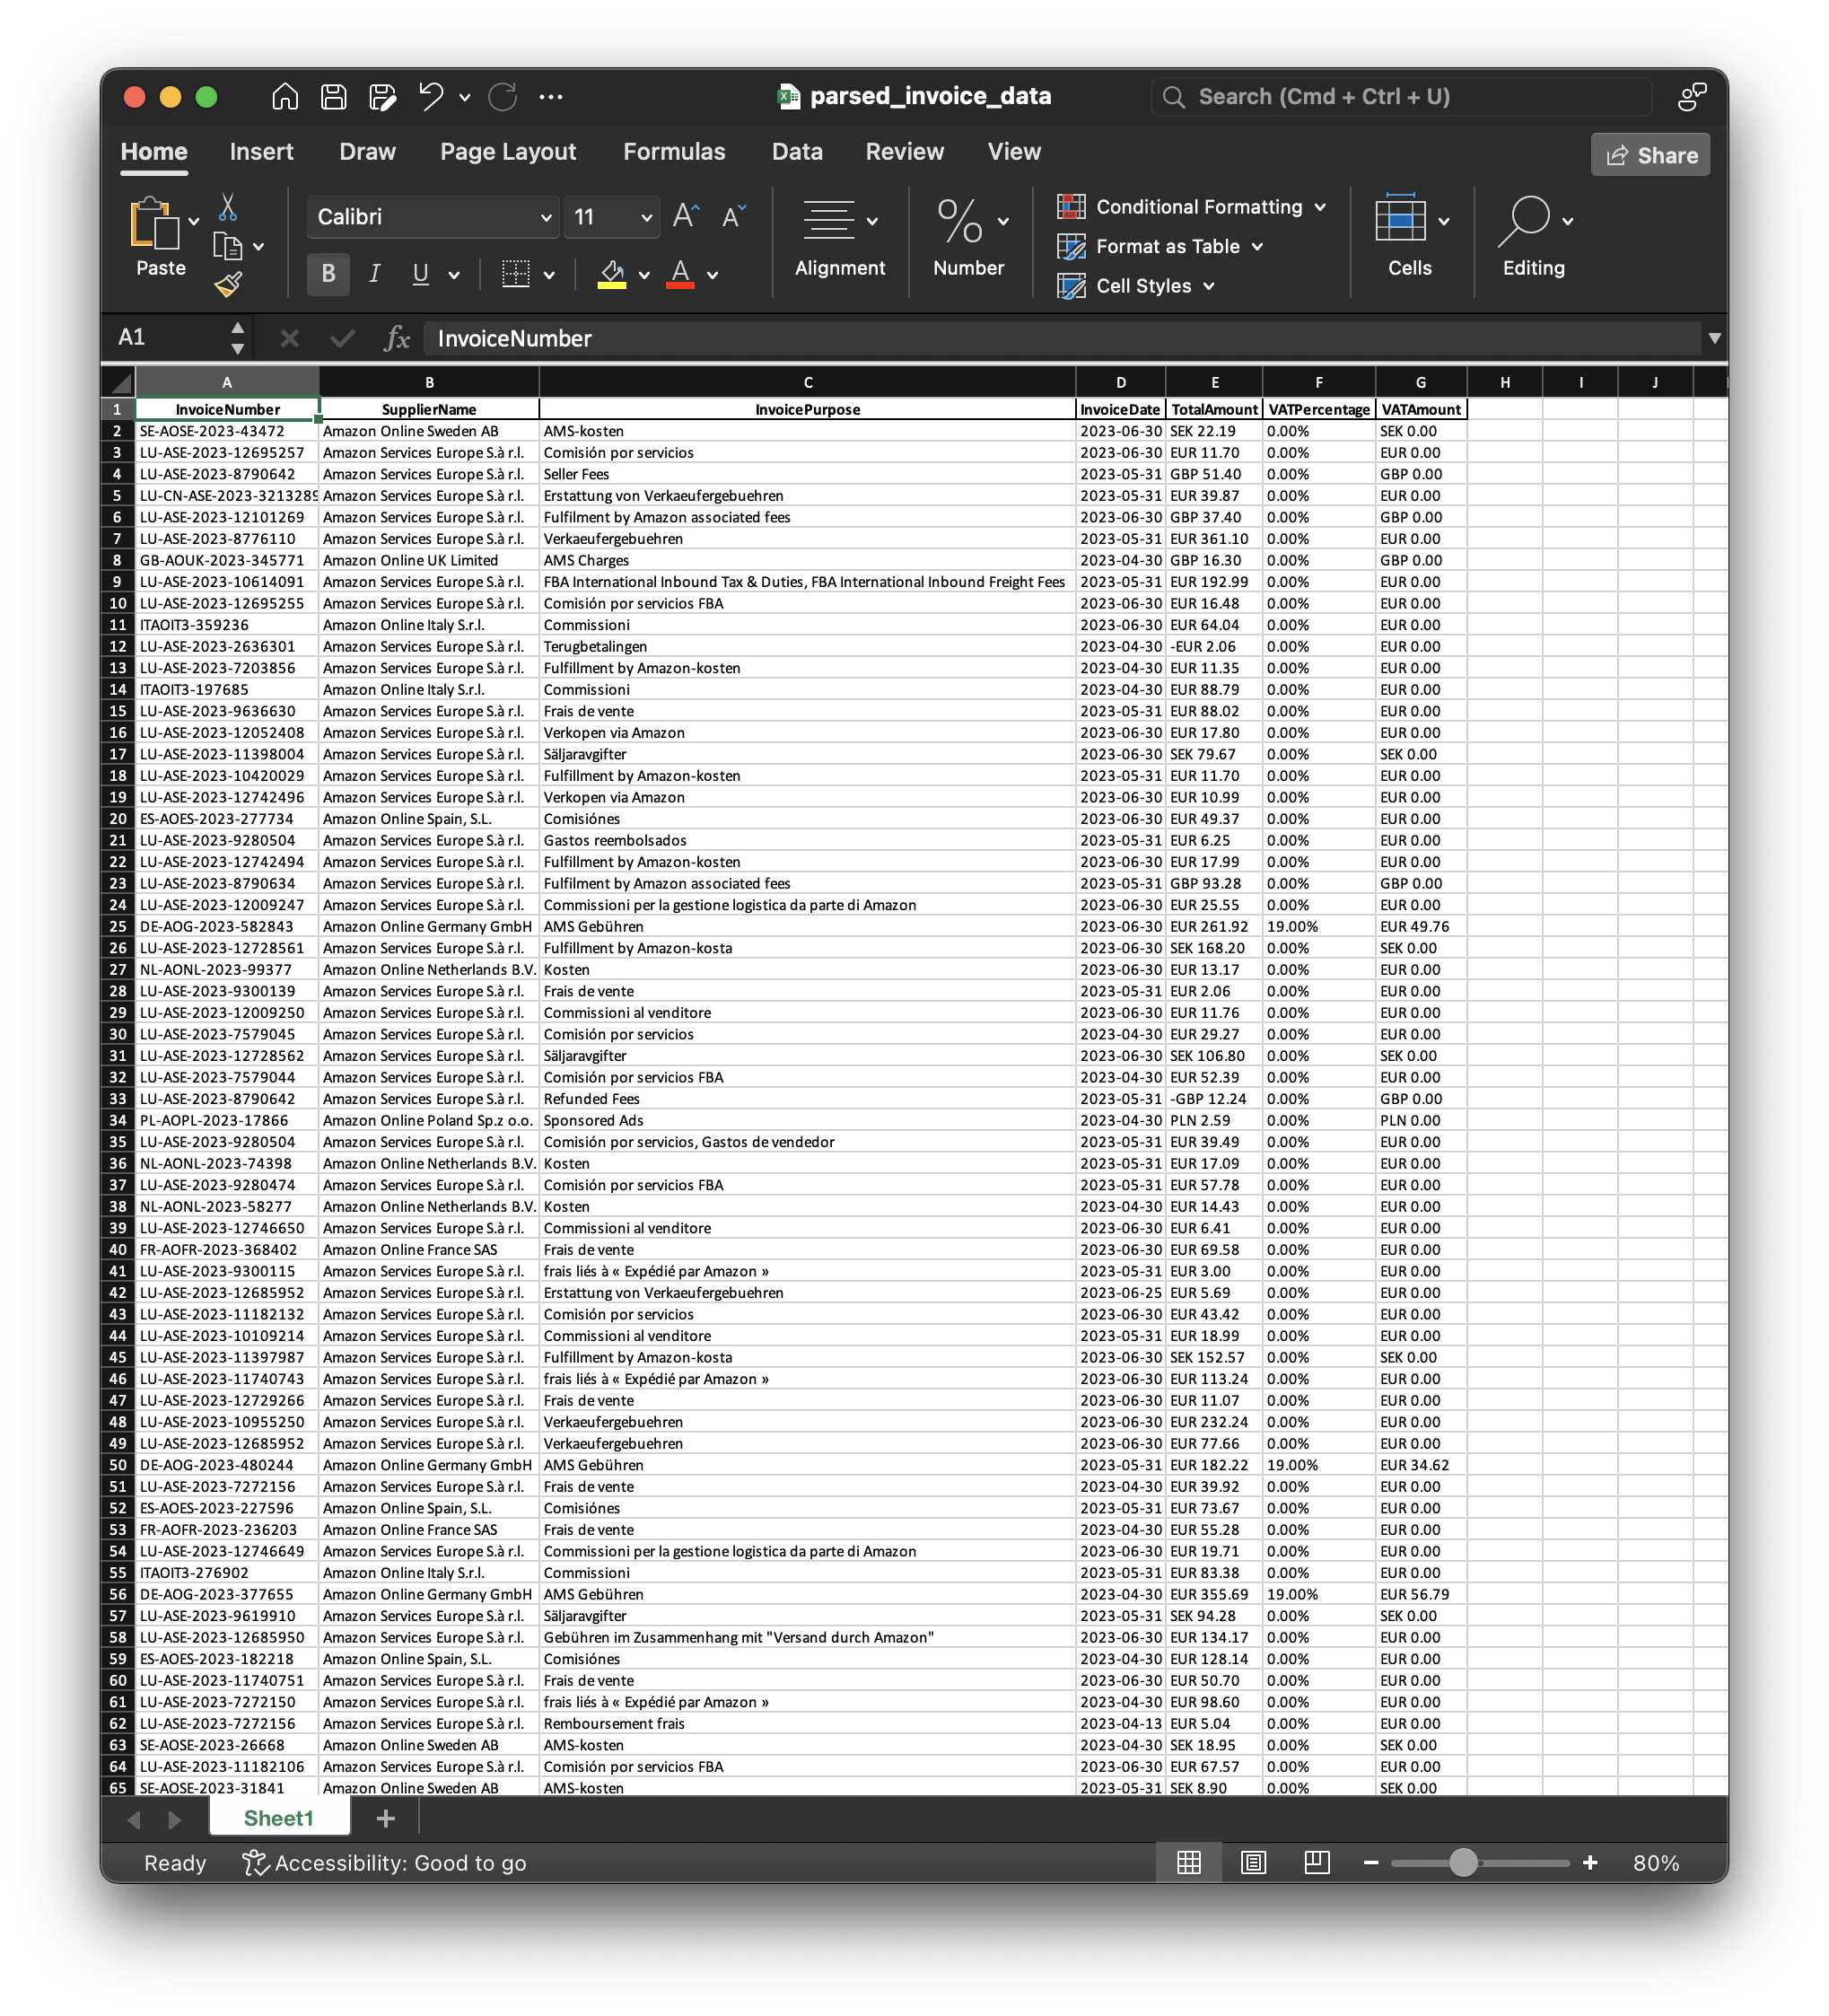 

## Wrap-up

This demonstration can show one of the many ways, non-programmers as well as beginner programmers can develop tools, including ones that are much more advanced and intricate than this demo. With **low-code** approaches on the rise (that requires minimal manual coding to build applications and processses), software develeopment is starting to become *democratized*. Software developers and SaaS company need to become aware of this trend, as a lot of more rudimentary tasks that are still paid by users, may soon be replaced by such applications brought by simple GPT prompts.

A few notes to remember regarding the code above:

* The above API call loop took about 4 minutes to finish and cost me around `USD 0.40`.

* Since this notebook is for demonstration purpose and not optimization, it is noteworthy to remember that the prompts could be changed in a way that they use less tokens. The loop could also be optimized for speed and another model could be used to send the API to (`davinci`, `ada` etc.)

* This notebook is not a definite and "accurate" way of parsing text and extracting critical financial information. It needs to be tested and fine-tuned. But even without much effort and improving the prompt and experimentation, it already produced an extremely accurate report with first try. 


I hope this could inspire a few people to start experimenting and coming up with fresh and original ideas. This is how technology often improves: trickling down of information. And we are still at the very beginning.